# Рекуррентные нейросети

![RNN](https://habrastorage.org/web/a9b/1e6/40f/a9b1e640f6264b0a902e851eb5f29e08.png)
![RNN full](https://habrastorage.org/web/5c8/0fa/c22/5c80fac224d449209d888d18ea1111a8.png)

# Попробуем запилить простую RNN для предсказания временных рядов

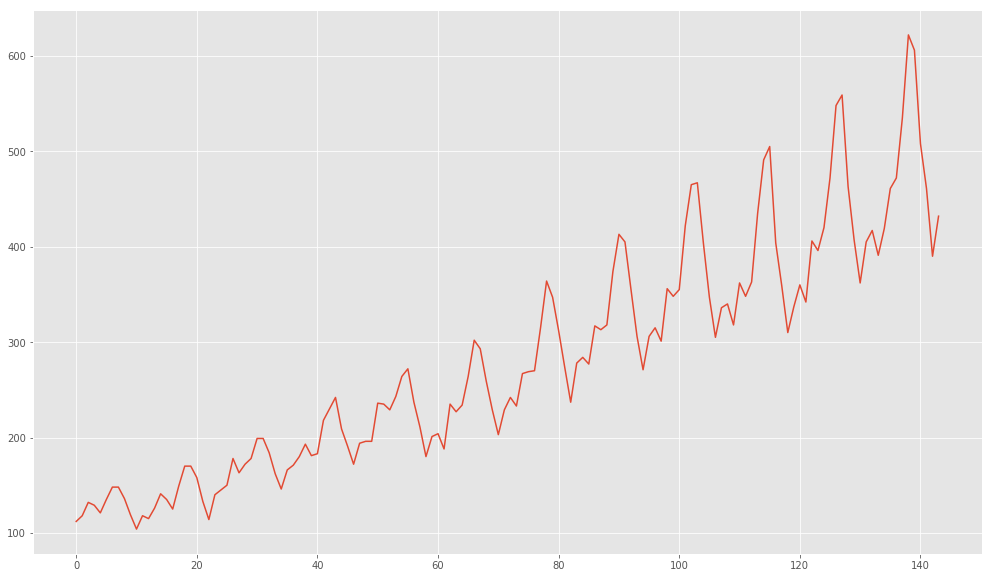

In [1]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 17, 10 # задаём размер графика 

dataset = pandas.read_csv('https://github.com/lazyprogrammer/machine_learning_examples/raw/master/airline/international-airline-passengers.csv', 
                          usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'theano' # подключение библиотеки theano в качестве "движка" для keras
from keras import backend as K # необходимо для некоторых операций

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# зафиксируем random_state для дальнейшей воспроизводимости эксперимента
numpy.random.seed(7)

dataset = dataset.values # Keras умеет хавать только numpy-матрицы
dataset = dataset.astype('float32')


# приведём все данные к интервалу значений от 0 до 1 (нормализуем)
# В принципе, если вы не используете регуляризацию, то можно не нормировать - результат будет тот же
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# разобьём данные на трейн и тест. 
# В задачах предсказания временный рядов это нужно делать осторожно, чтобы случайно не перемешать порядок данных!
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


# сконвертируем данные таким образом, чтобы для каждого временного тика (начиная с look_back) были добавлены 
# признаки для look_back предыдущих состояний
def create_dataset(dataset, look_back=1): # look_back - по какому количеству тиков времени мы собираемся предсказывать следующий
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] # берём все тики времени от i до i + look_back не включая
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 227, in <module>
    use(config.device)
  File "/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 214, in use
    init_dev(device, preallocate=preallocate)
  File "/home/artem/anaconda3/envs/Python3/lib/python3.6/site-packages/theano/gpuarray/__init__.py", line 99, in init_dev
    **args)
  File "pygpu/gpuarray.pyx", line 651, in pygpu.gpuarray.init
  File "pygpu/gpuarray.pyx", line 587, 

96 48


In [8]:
# LSTM и RNN умеет работать с данными в таком формате [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# А вот и вся наша нейросетка :)
model = Sequential()
model.add(SimpleRNN(4, batch_input_shape=(1, look_back, 1))) # 4 - размерность выхода, batch_input_shape = [batch_size, time steps, features]
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 0.0754
Epoch 2/100
 - 0s - loss: 0.0294
Epoch 3/100
 - 0s - loss: 0.0232
Epoch 4/100
 - 0s - loss: 0.0193
Epoch 5/100
 - 0s - loss: 0.0159
Epoch 6/100
 - 0s - loss: 0.0129
Epoch 7/100
 - 0s - loss: 0.0100
Epoch 8/100
 - 0s - loss: 0.0076
Epoch 9/100
 - 0s - loss: 0.0058
Epoch 10/100
 - 0s - loss: 0.0045
Epoch 11/100
 - 0s - loss: 0.0035
Epoch 12/100
 - 0s - loss: 0.0029
Epoch 13/100
 - 0s - loss: 0.0025
Epoch 14/100
 - 0s - loss: 0.0023
Epoch 15/100
 - 0s - loss: 0.0022
Epoch 16/100
 - 0s - loss: 0.0021
Epoch 17/100
 - 0s - loss: 0.0020
Epoch 18/100
 - 0s - loss: 0.0020
Epoch 19/100
 - 0s - loss: 0.0020
Epoch 20/100
 - 0s - loss: 0.0020
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0019
Epoch 29/100
 - 0s - loss: 0.0019
Epoch 30/100
 - 0s - lo

In [10]:
# получим предсказания
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# преобразуем обратно наши данные из интервала (0, 1) в исходных диапазон значений
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# посчитаем MSE для наших предсказаний
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.43 RMSE
Test Score: 61.10 RMSE


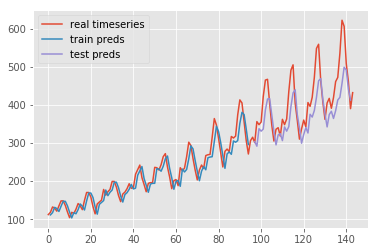

In [25]:
trainPredictPlot = numpy.empty_like(dataset) # предсказания для train'a
trainPredictPlot[:, :] = numpy.nan # заполняем пустыми значениями
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(dataset)-look_back-len(testPredict):len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='real timeseries')
plt.plot(trainPredictPlot, label='train preds')
plt.plot(testPredictPlot, label='test preds')
plt.legend()
plt.show()

# Сброс состояний перед каждым обучением

## Упражнение 1

In [28]:
# TODO: проделываем те же махинации до стадии с обучением

In [29]:
# Обучаем со сбросом состояний
for epoch in range(NB_EPOCHES):
    model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=0)
    model.reset_states()

In [31]:
# TODO: посмотрите на качество предсказаний

## LSTM
![lstm](https://habrastorage.org/web/67b/04f/73b/67b04f73b4c34ba38edfa207e09de07c.png)

## Упражнение 2

In [30]:
from keras.layers import LSTM

# TODO проделайте все те же телодвижения с LSTM. Проверьте, есть ли прирост качества, и объясните полученные результаты

# Полезные ссылки
* Огненная [статья](https://habrahabr.ru/company/wunderfund/blog/331310/) про RNN и LSTM на Хабре
* Годная [статья](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) с подробным разбором примера на Keras